In [1]:
import pandas as pand
import numpy as np
import seaborn as sbrn
import matplotlib.pyplot as mplot

In [3]:
df=pand.read_csv('covid_19_clean_complete.csv')

In [5]:
df['Date'] = pand.to_datetime(df['Date'])

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [9]:
df['Province/State'] = df['Province/State'].fillna('Unknown')

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [13]:
df['Active'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])

In [15]:
negative_active_cases = df[df['Active'] < 0]
print(negative_active_cases)

        Province/State  Country/Region        Lat        Long       Date  \
16238           Hainan           China  19.195900  109.745300 2020-03-24   
16499           Hainan           China  19.195900  109.745300 2020-03-25   
16760           Hainan           China  19.195900  109.745300 2020-03-26   
17021           Hainan           China  19.195900  109.745300 2020-03-27   
17282           Hainan           China  19.195900  109.745300 2020-03-28   
17543           Hainan           China  19.195900  109.745300 2020-03-29   
17804           Hainan           China  19.195900  109.745300 2020-03-30   
18065           Hainan           China  19.195900  109.745300 2020-03-31   
18326           Hainan           China  19.195900  109.745300 2020-04-01   
32059  Channel Islands  United Kingdom  49.372300   -2.364400 2020-05-23   
32320  Channel Islands  United Kingdom  49.372300   -2.364400 2020-05-24   
32581  Channel Islands  United Kingdom  49.372300   -2.364400 2020-05-25   
33886  Chann

In [17]:
cleaned_data_summary = df.describe(include='all')
print(cleaned_data_summary)

       Province/State Country/Region           Lat          Long  \
count           49068          49068  49068.000000  49068.000000   
unique             79            187           NaN           NaN   
top           Unknown          China           NaN           NaN   
freq            34404           6204           NaN           NaN   
mean              NaN            NaN     21.433730     23.528236   
min               NaN            NaN    -51.796300   -135.000000   
25%               NaN            NaN      7.873054    -15.310100   
50%               NaN            NaN     23.634500     21.745300   
75%               NaN            NaN     41.204380     80.771797   
max               NaN            NaN     71.706900    178.065000   
std               NaN            NaN     24.950320     70.442740   

                       Date     Confirmed         Deaths     Recovered  \
count                 49068  4.906800e+04   49068.000000  4.906800e+04   
unique                  NaN        

In [19]:
negative_active_cases = df[df['Active'] < 0]
print(f"Rows with negative 'Active' values: {len(negative_active_cases)}")

Rows with negative 'Active' values: 18


In [21]:
print(negative_active_cases[['Country/Region', 'Province/State', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']])

       Country/Region   Province/State       Date  Confirmed  Deaths  \
16238           China           Hainan 2020-03-24        168       6   
16499           China           Hainan 2020-03-25        168       6   
16760           China           Hainan 2020-03-26        168       6   
17021           China           Hainan 2020-03-27        168       6   
17282           China           Hainan 2020-03-28        168       6   
17543           China           Hainan 2020-03-29        168       6   
17804           China           Hainan 2020-03-30        168       6   
18065           China           Hainan 2020-03-31        168       6   
18326           China           Hainan 2020-04-01        168       6   
32059  United Kingdom  Channel Islands 2020-05-23        558      45   
32320  United Kingdom  Channel Islands 2020-05-24        558      45   
32581  United Kingdom  Channel Islands 2020-05-25        559      45   
33886  United Kingdom  Channel Islands 2020-05-30        560    

In [23]:
invalid_cases = df[df['Confirmed'] < (df['Deaths'] + df['Recovered'])]
print(f"Rows violating logical consistency: {len(invalid_cases)}")

Rows violating logical consistency: 18


In [25]:
print(invalid_cases[['Country/Region', 'Province/State', 'Date', 'Confirmed', 'Deaths', 'Recovered']])

       Country/Region   Province/State       Date  Confirmed  Deaths  \
16238           China           Hainan 2020-03-24        168       6   
16499           China           Hainan 2020-03-25        168       6   
16760           China           Hainan 2020-03-26        168       6   
17021           China           Hainan 2020-03-27        168       6   
17282           China           Hainan 2020-03-28        168       6   
17543           China           Hainan 2020-03-29        168       6   
17804           China           Hainan 2020-03-30        168       6   
18065           China           Hainan 2020-03-31        168       6   
18326           China           Hainan 2020-04-01        168       6   
32059  United Kingdom  Channel Islands 2020-05-23        558      45   
32320  United Kingdom  Channel Islands 2020-05-24        558      45   
32581  United Kingdom  Channel Islands 2020-05-25        559      45   
33886  United Kingdom  Channel Islands 2020-05-30        560    

In [27]:
df.loc[df['Active'] < 0, 'Active'] = 0

In [29]:
df = df[df['Active'] >= 0]

In [31]:
df = df[~(df['Confirmed'] < (df['Deaths'] + df['Recovered']))]

In [33]:
print(f"Remaining negative 'Active' values: {len(df[df['Active'] < 0])}")

Remaining negative 'Active' values: 0


In [35]:
print(f"Remaining invalid cases: {len(df[df['Confirmed'] < (df['Deaths'] + df['Recovered'])])}")

Remaining invalid cases: 0


In [37]:
invalid_geography = df[(df['Lat'] < -90) | (df['Lat'] > 90) |
                               (df['Long'] < -180) | (df['Long'] > 180)]
print(f"Rows with invalid geography: {len(invalid_geography)}")


Rows with invalid geography: 0


In [39]:
numeric_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df[numeric_columns] = df[numeric_columns].fillna(0)

In [43]:
print(df.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [45]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [47]:
df = df.drop_duplicates()

In [49]:
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")

Duplicate rows after cleaning: 0


In [51]:
print(df['Date'].dtype)

datetime64[ns]


In [53]:
df['Country/Region'] = df['Country/Region'].str.strip().str.title()
df['Province/State'] = df['Province/State'].str.strip().str.title()

In [55]:
df['Country/Region'] = df['Country/Region'].replace({
    'Us': 'United States',
    'Uk': 'United Kingdom'
})

In [57]:
print(df.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [59]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [61]:
print(df.head())

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0        Unknown    Afghanistan  33.93911  67.709953 2020-01-22          0   
1        Unknown        Albania  41.15330  20.168300 2020-01-22          0   
2        Unknown        Algeria  28.03390   1.659600 2020-01-22          0   
3        Unknown        Andorra  42.50630   1.521800 2020-01-22          0   
4        Unknown         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [63]:
print(df.tail())

      Province/State         Country/Region        Lat       Long       Date  \
49063        Unknown  Sao Tome And Principe   0.186400   6.613100 2020-07-27   
49064        Unknown                  Yemen  15.552727  48.516388 2020-07-27   
49065        Unknown                Comoros -11.645500  43.333300 2020-07-27   
49066        Unknown             Tajikistan  38.861000  71.276100 2020-07-27   
49067        Unknown                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  


In [65]:
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active']

In [67]:
print(df[numerical_columns].describe())

          Confirmed         Deaths     Recovered        Active
count  4.905000e+04   49050.000000  4.905000e+04  4.905000e+04
mean   1.689097e+04     884.496045  7.918489e+03  8.087981e+03
std    1.273232e+05    6314.721098  5.481078e+04  7.627274e+04
min    0.000000e+00       0.000000  0.000000e+00  0.000000e+00
25%    4.000000e+00       0.000000  0.000000e+00  0.000000e+00
50%    1.680000e+02       2.000000  2.900000e+01  2.600000e+01
75%    1.520000e+03      30.000000  6.660000e+02  6.060000e+02
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06


In [75]:
df.to_csv('C:/Users/DELL/Desktop/3MTT/cleaned_covid_data.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [77]:
print(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].describe())

          Confirmed         Deaths     Recovered        Active
count  4.905000e+04   49050.000000  4.905000e+04  4.905000e+04
mean   1.689097e+04     884.496045  7.918489e+03  8.087981e+03
std    1.273232e+05    6314.721098  5.481078e+04  7.627274e+04
min    0.000000e+00       0.000000  0.000000e+00  0.000000e+00
25%    4.000000e+00       0.000000  0.000000e+00  0.000000e+00
50%    1.680000e+02       2.000000  2.900000e+01  2.600000e+01
75%    1.520000e+03      30.000000  6.660000e+02  6.060000e+02
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06


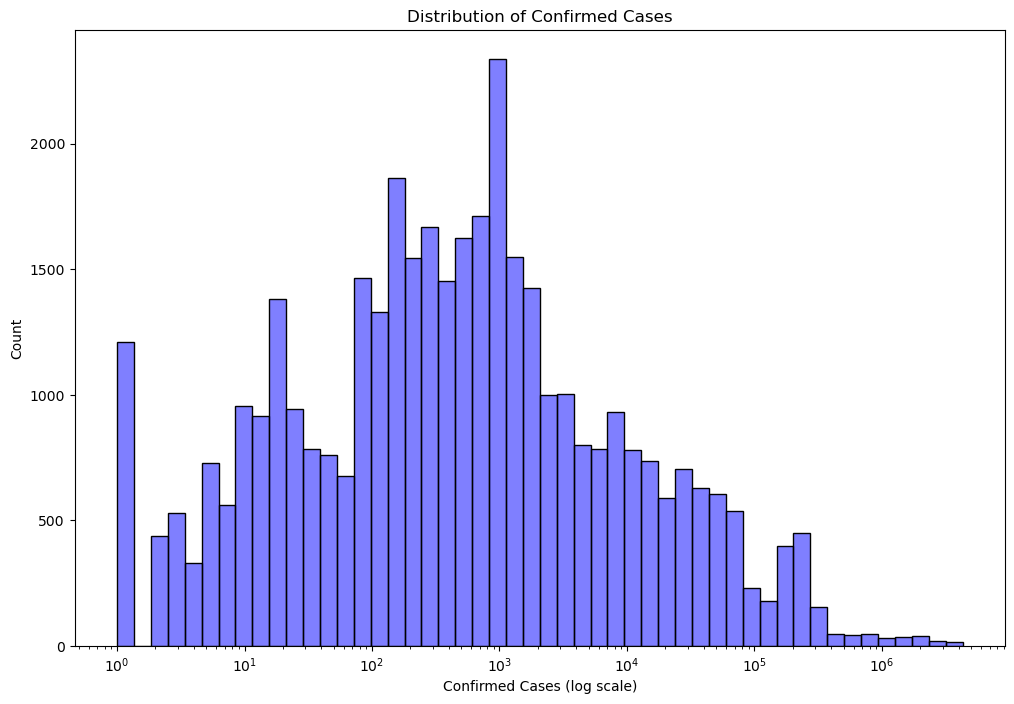

In [81]:
mplot.figure(figsize=(12, 8))
sbrn.histplot(df['Confirmed'], kde=True, log_scale=True, bins=50, color='blue')
mplot.title('Distribution of Confirmed Cases')
mplot.xlabel('Confirmed Cases (log scale)')
plot.show()


In [83]:
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

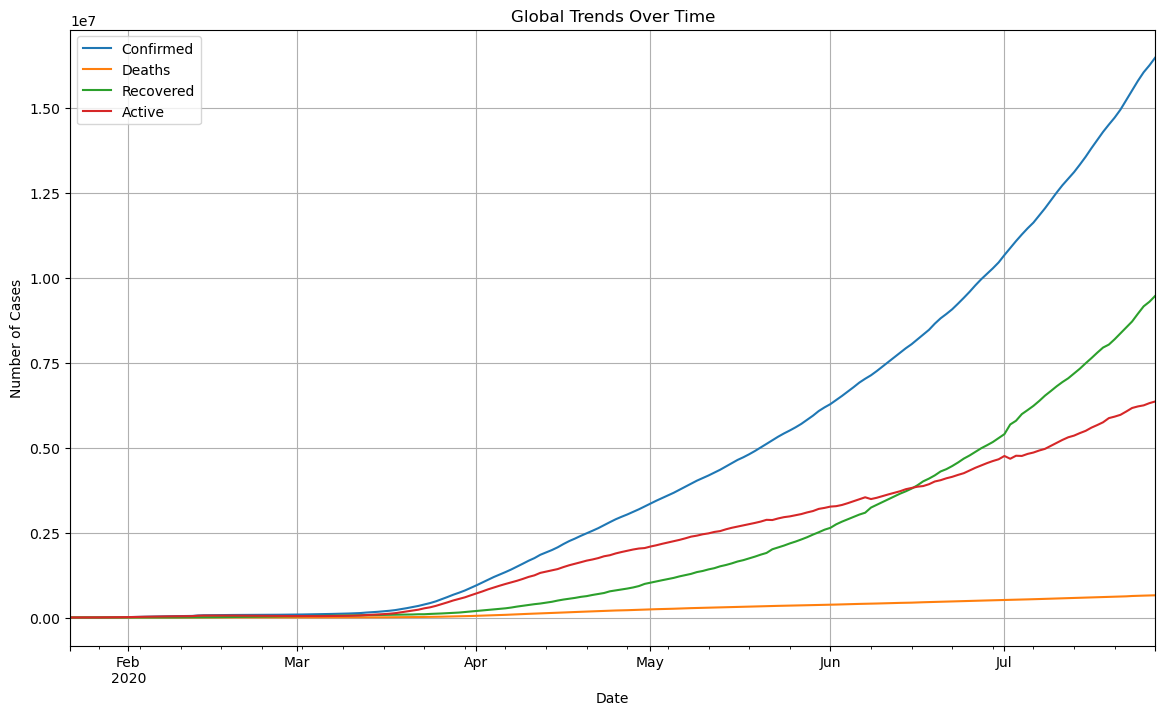

In [85]:
mplot.figure(figsize=(14, 8))
global_trends.plot(ax=mplot.gca())
mplot.title('Global Trends Over Time')
mplot.xlabel('Date')
mplot.ylabel('Number of Cases')
mplot.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
mplot.grid()
mplot.show()

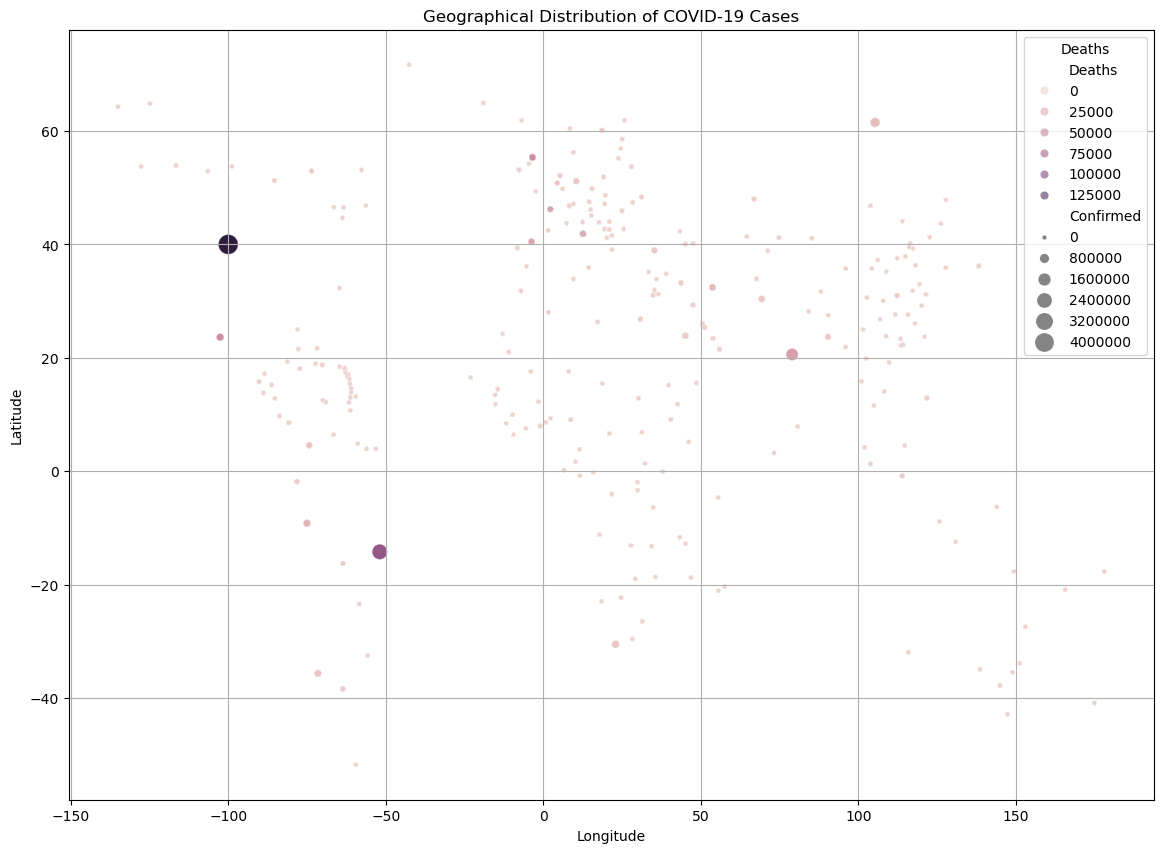

In [87]:
mplot.figure(figsize=(14, 10))
sbrn.scatterplot(data=df, x='Long', y='Lat', size='Confirmed', hue='Deaths', sizes=(10, 200), alpha=0.6)
mplot.title('Geographical Distribution of COVID-19 Cases')
mplot.xlabel('Longitude')
mplot.ylabel('Latitude')
mplot.legend(title='Deaths', loc='upper right')
mplot.grid()
mplot.show()

In [89]:
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].max().sort_values(by='Confirmed', ascending=False)

In [93]:
top_countries = df.head(11)
print(top_countries)

                  Province/State       Country/Region       Lat        Long  \
0                        Unknown          Afghanistan  33.93911   67.709953   
1                        Unknown              Albania  41.15330   20.168300   
2                        Unknown              Algeria  28.03390    1.659600   
3                        Unknown              Andorra  42.50630    1.521800   
4                        Unknown               Angola -11.20270   17.873900   
5                        Unknown  Antigua And Barbuda  17.06080  -61.796400   
6                        Unknown            Argentina -38.41610  -63.616700   
7                        Unknown              Armenia  40.06910   45.038200   
8   Australian Capital Territory            Australia -35.47350  149.012400   
9                New South Wales            Australia -33.86880  151.209300   
10            Northern Territory            Australia -12.46340  130.845600   

         Date  Confirmed  Deaths  Recovered  Active

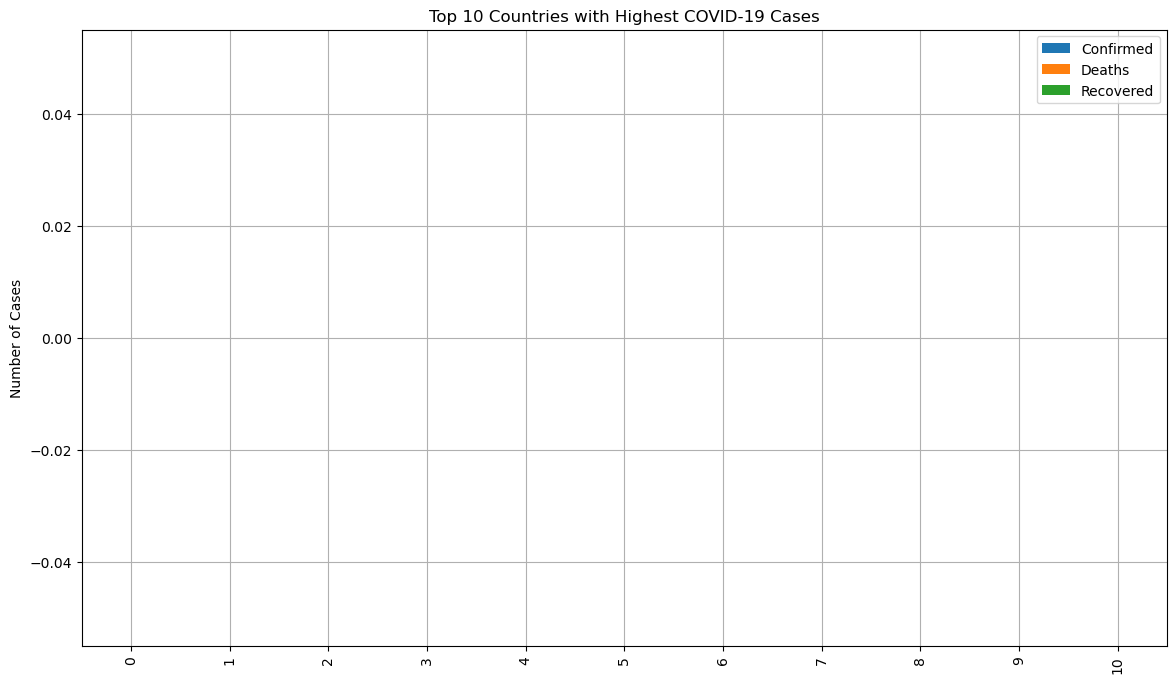

In [95]:
mplot.figure(figsize=(14, 8))
top_countries[['Confirmed', 'Deaths', 'Recovered']].plot(kind='bar', ax=mplot.gca())
mplot.title('Top 10 Countries with Highest COVID-19 Cases')
mplot.ylabel('Number of Cases')
mplot.grid()
mplot.show()

In [97]:
df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']) * 100
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100


In [99]:
global_mortality = df['Mortality Rate'].mean()
global_recovery = df['Recovery Rate'].mean()

In [101]:
print(f"Global Mortality Rate: {global_mortality:.2f}%")
print(f"Global Recovery Rate: {global_recovery:.2f}%")

Global Mortality Rate: 2.80%
Global Recovery Rate: 47.51%


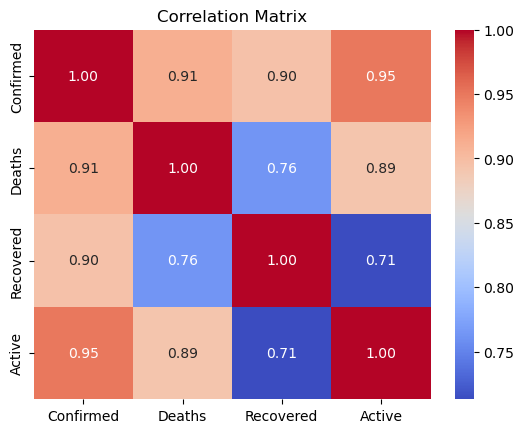

In [103]:
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
sbrn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
mplot.title('Correlation Matrix')
mplot.show()

In [105]:
df['Country/Region'] = df['Country/Region'].str.strip().str.title()
df['Province/State'] = df['Province/State'].str.strip().str.title()

In [107]:
df['Country/Region'] = df['Country/Region'].replace({
    'Us': 'United States',
    'Uk': 'United Kingdom'
})

In [109]:
df['Confirmed_log'] = np.log1p(df['Confirmed'])

In [111]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [115]:
normalized_data = scaler.fit_transform(df[numerical_columns])

In [117]:
normalized_df = pand.DataFrame(normalized_data, columns=numerical_columns)

In [119]:
df[numerical_columns] = normalized_df

In [121]:
print(df[numerical_columns].mean())
print(df[numerical_columns].std())

Confirmed    0.000037
Deaths       0.000041
Recovered    0.000029
Active       0.000037
dtype: float64
Confirmed    1.000189
Deaths       1.000189
Recovered    1.000180
Active       1.000192
dtype: float64


In [125]:
df.to_csv('C:/Users/DELL/Desktop/3MTT/normalized_covid_data.csv', index=False)
print("Normalized dataset saved successfully.")

Normalized dataset saved successfully.


In [127]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
minmax_scaler = MinMaxScaler()

In [131]:
scaled_data = minmax_scaler.fit_transform(df[numerical_columns])

In [133]:
df[numerical_columns] = scaled_data

In [135]:
df = df.sort_values(by=['Country/Region', 'Province/State', 'Date'])

In [139]:
df['Daily Growth Rate (%)'] = df['Daily Growth Rate (%)'].fillna(0)

In [143]:
df['Mortality Ratio (%)'] = (df['Deaths'] / df['Confirmed']) * 100

In [145]:
df['Mortality Ratio (%)'] = df['Mortality Ratio (%)'].replace([np.inf, np.nan], 0)

In [147]:
if 'Population' not in df.columns:
    df['Population'] = 1000000

In [149]:
df['Cases Per 100k Population'] = (df['Confirmed'] / df['Population']) * 100000

In [151]:
df['Cases Per 100k Population'] = df['Cases Per 100k Population'].replace([np.inf, np.nan], 0)

In [153]:
print(df[['Date', 'Country/Region', 'Province/State', 'Daily Growth Rate (%)', 'Mortality Ratio (%)', 'Cases Per 100k Population']].head())

           Date Country/Region Province/State  Daily Growth Rate (%)  \
0    2020-01-22    Afghanistan        Unknown                    NaN   
261  2020-01-23    Afghanistan        Unknown                    NaN   
522  2020-01-24    Afghanistan        Unknown                    NaN   
783  2020-01-25    Afghanistan        Unknown                    NaN   
1044 2020-01-26    Afghanistan        Unknown                    NaN   

      Mortality Ratio (%)  Cases Per 100k Population  
0                     0.0                        0.0  
261                   0.0                        0.0  
522                   0.0                        0.0  
783                   0.0                        0.0  
1044                  0.0                        0.0  


In [155]:
df.to_csv('C:/Users/DELL/Desktop/3MTT/enriched_covid_data.csv', index=False)
print("Enriched dataset saved successfully.")

Enriched dataset saved successfully.


In [157]:
sbrn.set(style="whitegrid")

In [159]:
features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Daily Growth Rate (%)']

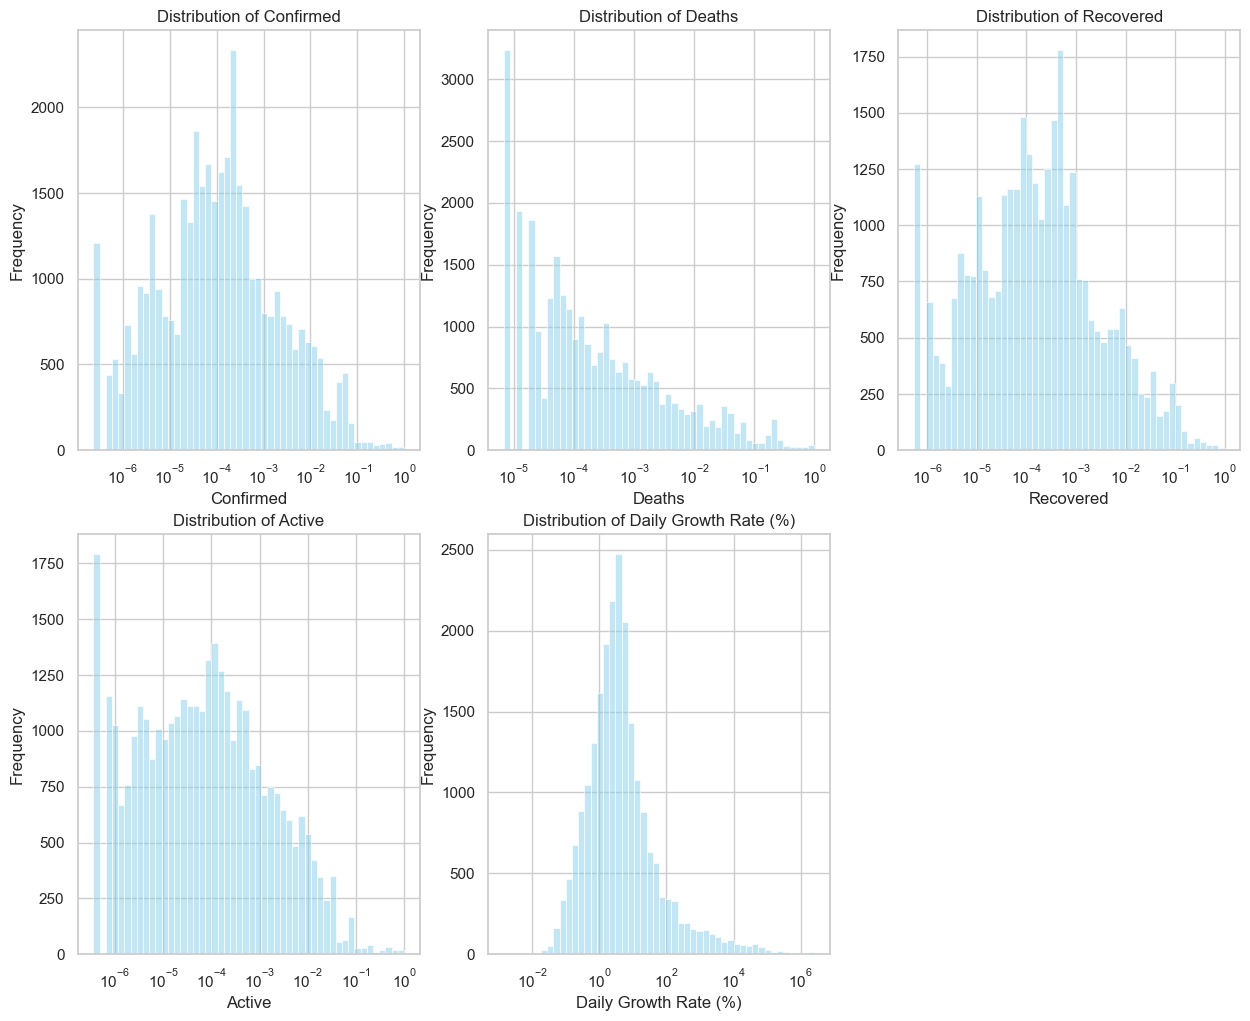

In [163]:
mplot.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    mplot.subplot(2, 3, i)
    sbrn.histplot(df[feature], kde=True, log_scale=True, bins=50, color='skyblue')
    mplot.title(f'Distribution of {feature}')
    mplot.xlabel(f'{feature}')
    mplot.ylabel('Frequency')

In [165]:
mplot.tight_layout()
mplot.show()

<Figure size 640x480 with 0 Axes>

In [167]:
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

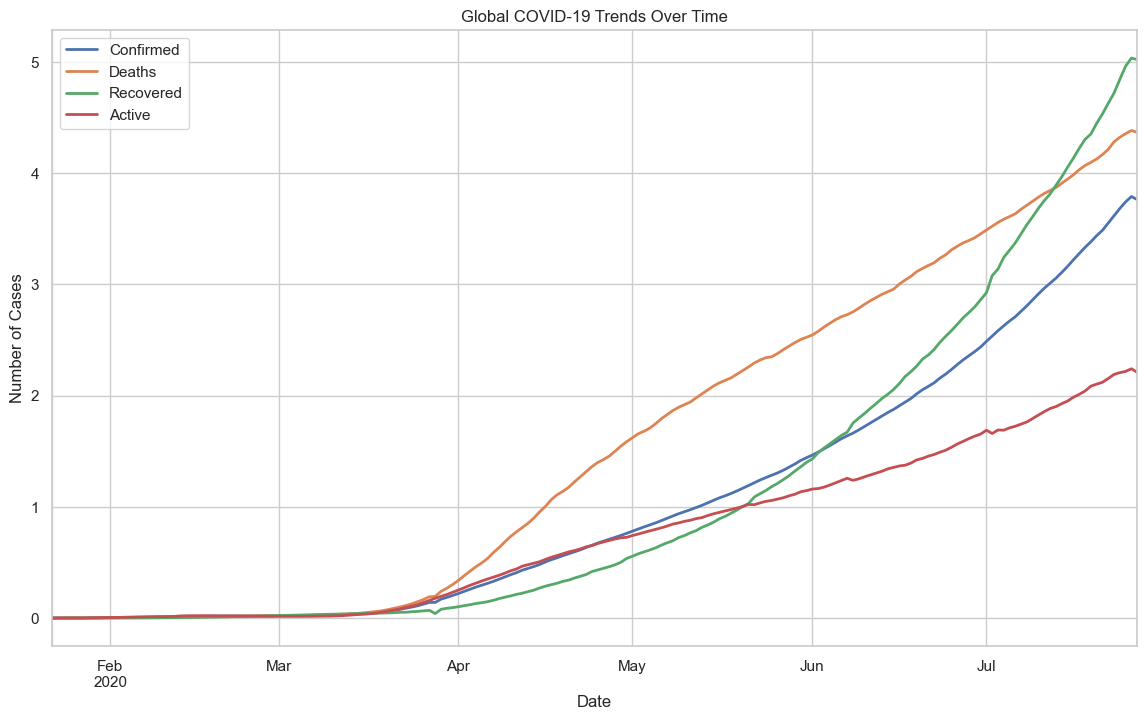

In [171]:
mplot.figure(figsize=(14, 8))
global_trends.plot(ax=mplot.gca(), linewidth=2)
mplot.title('Global COVID-19 Trends Over Time')
mplot.xlabel('Date')
mplot.ylabel('Number of Cases')
mplot.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
mplot.grid(True)
mplot.show()

In [173]:
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].max()

In [175]:
top_countries = df.sort_values(by='Confirmed', ascending=False).head(10)

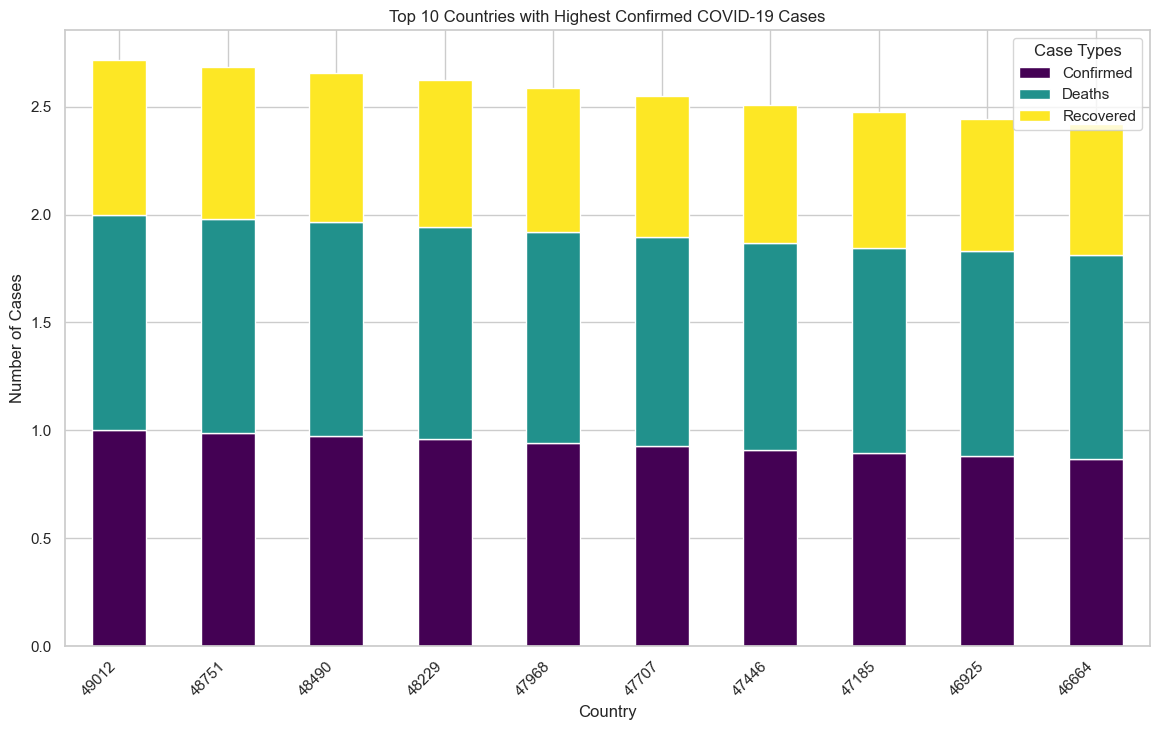

In [181]:
mplot.figure(figsize=(14, 8))
top_countries[['Confirmed', 'Deaths', 'Recovered']].plot(kind='bar', stacked=True, ax=mplot.gca(), colormap='viridis')
mplot.title('Top 10 Countries with Highest Confirmed COVID-19 Cases')
mplot.xlabel('Country')
mplot.ylabel('Number of Cases')
mplot.xticks(rotation=45, ha='right')
mplot.legend(title='Case Types')
mplot.grid(True)
mplot.show()

In [183]:
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Mortality Ratio (%)', 'Cases Per 100k Population', 'Daily Growth Rate (%)']].corr()

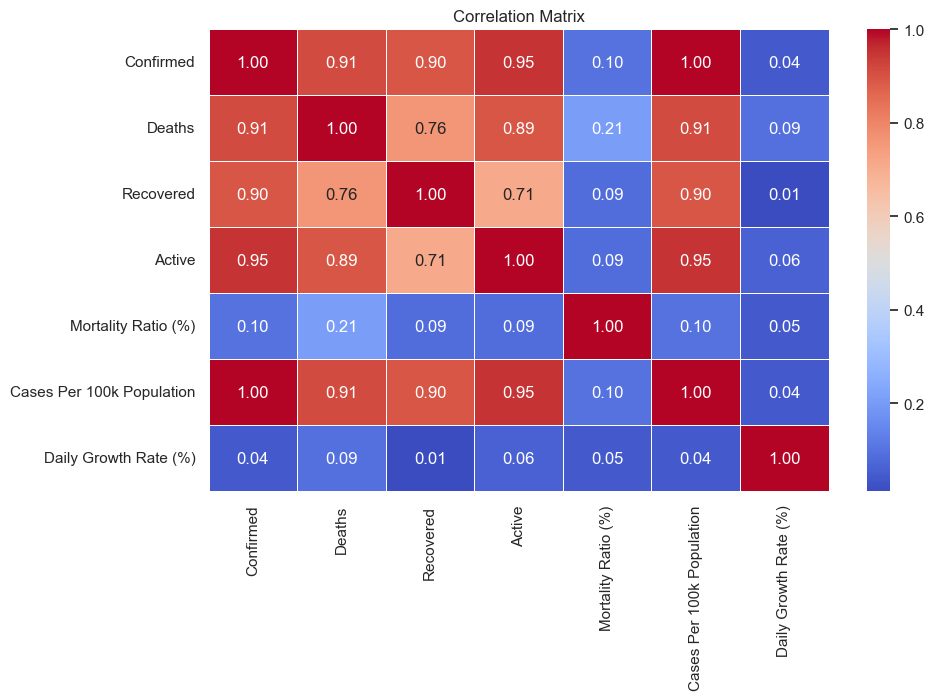

In [185]:
mplot.figure(figsize=(10, 6))
sbrn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
mplot.title('Correlation Matrix')
mplot.show()

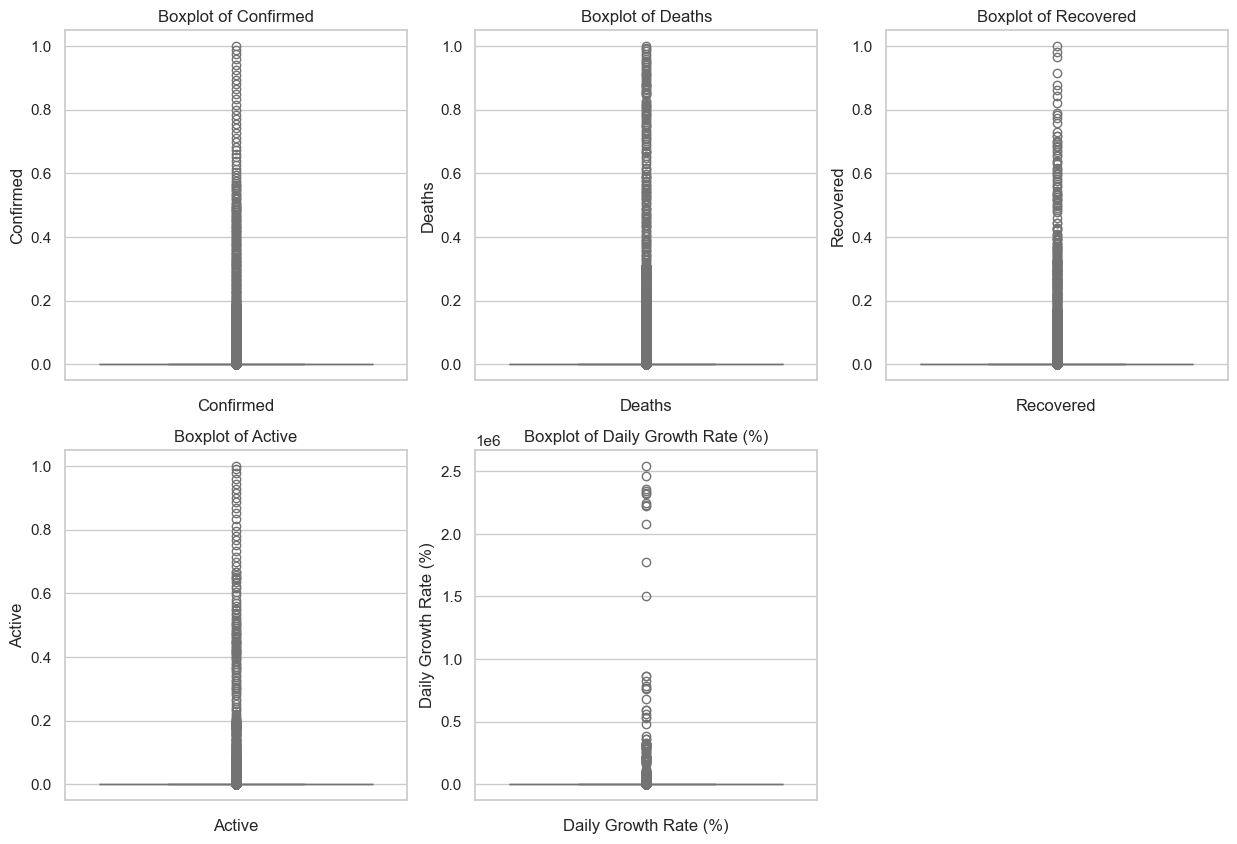

In [189]:
mplot.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    mplot.subplot(2, 3, i)
    sbrn.boxplot(data=df[feature], color='lightgreen')
    mplot.title(f'Boxplot of {feature}')
    mplot.xlabel(f'{feature}')

In [191]:
mplot.tight_layout()
mplot.show()

<Figure size 640x480 with 0 Axes>

In [193]:
mplot.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 0, 'Mortality Ratio (%)')

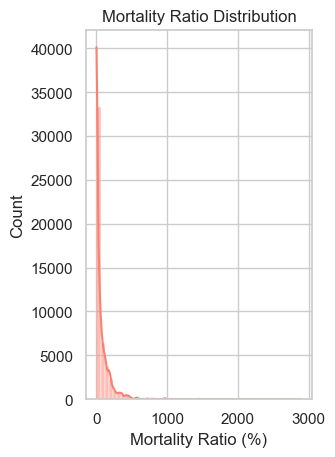

In [195]:
mplot.subplot(1, 2, 1)
sbrn.histplot(df['Mortality Ratio (%)'], kde=True, bins=50, color='salmon')
mplot.title('Mortality Ratio Distribution')
mplot.xlabel('Mortality Ratio (%)')

Text(0.5, 0, 'Recovery Rate (%)')

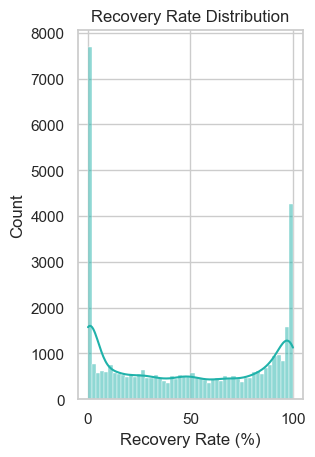

In [197]:
mplot.subplot(1, 2, 2)
sbrn.histplot(df['Recovery Rate'], kde=True, bins=50, color='lightseagreen')
mplot.title('Recovery Rate Distribution')
mplot.xlabel('Recovery Rate (%)')

In [201]:
mplot.tight_layout()
mplot.show()

<Figure size 640x480 with 0 Axes>

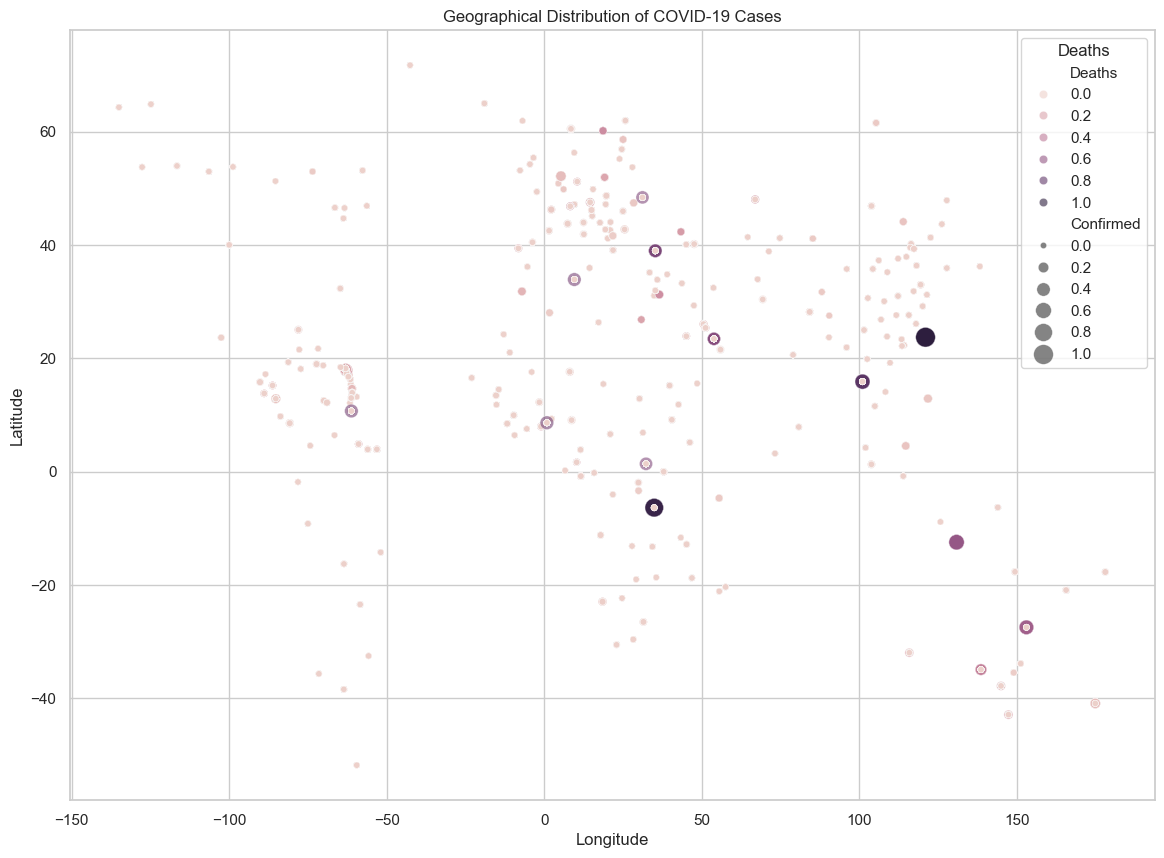

In [203]:
mplot.figure(figsize=(14, 10))
sbrn.scatterplot(data=df, x='Long', y='Lat', size='Confirmed', hue='Deaths', sizes=(20, 200), alpha=0.6)
mplot.title('Geographical Distribution of COVID-19 Cases')
mplot.xlabel('Longitude')
mplot.ylabel('Latitude')
mplot.legend(title='Deaths', loc='upper right')
mplot.grid(True)
mplot.show()


In [205]:
country_growth = df.groupby('Country/Region')['Daily Growth Rate (%)'].mean().sort_values(ascending=False)

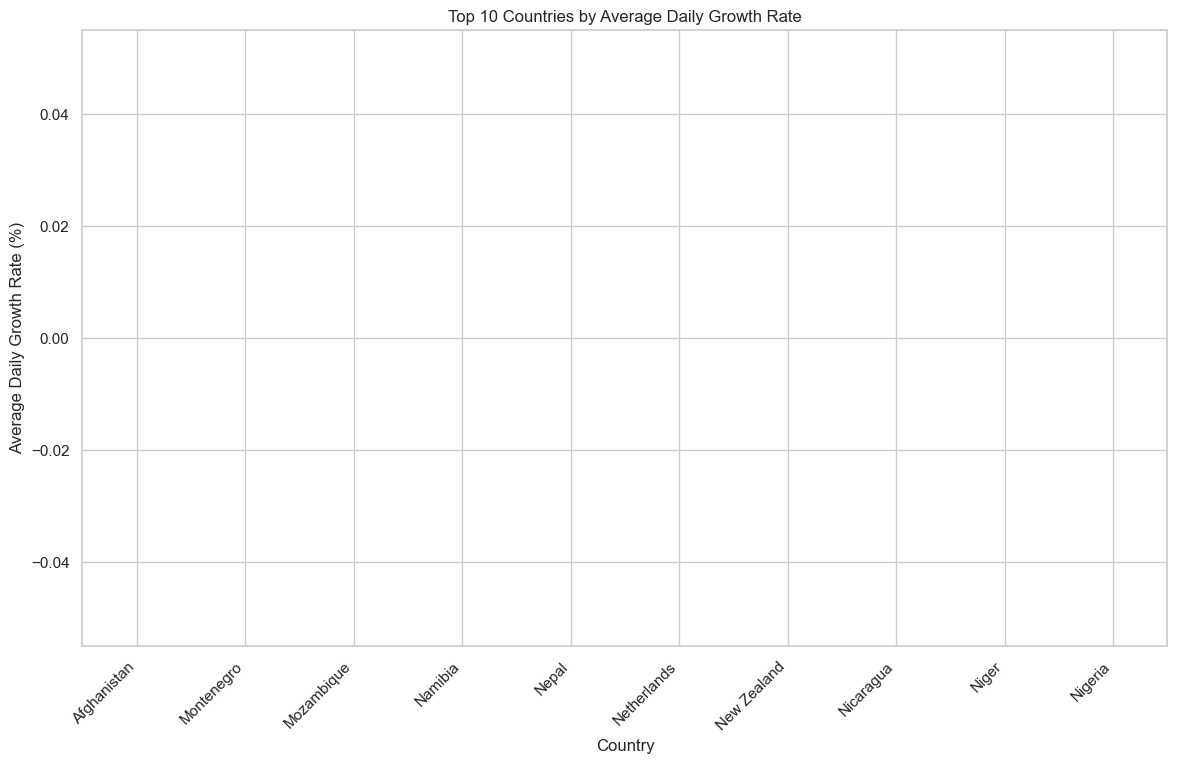

In [207]:
mplot.figure(figsize=(14, 8))
country_growth.head(10).plot(kind='bar', color='purple')
mplot.title('Top 10 Countries by Average Daily Growth Rate')
mplot.xlabel('Country')
mplot.ylabel('Average Daily Growth Rate (%)')
mplot.xticks(rotation=45, ha='right')
mplot.grid(True)
mplot.show()

In [209]:
global_trends = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

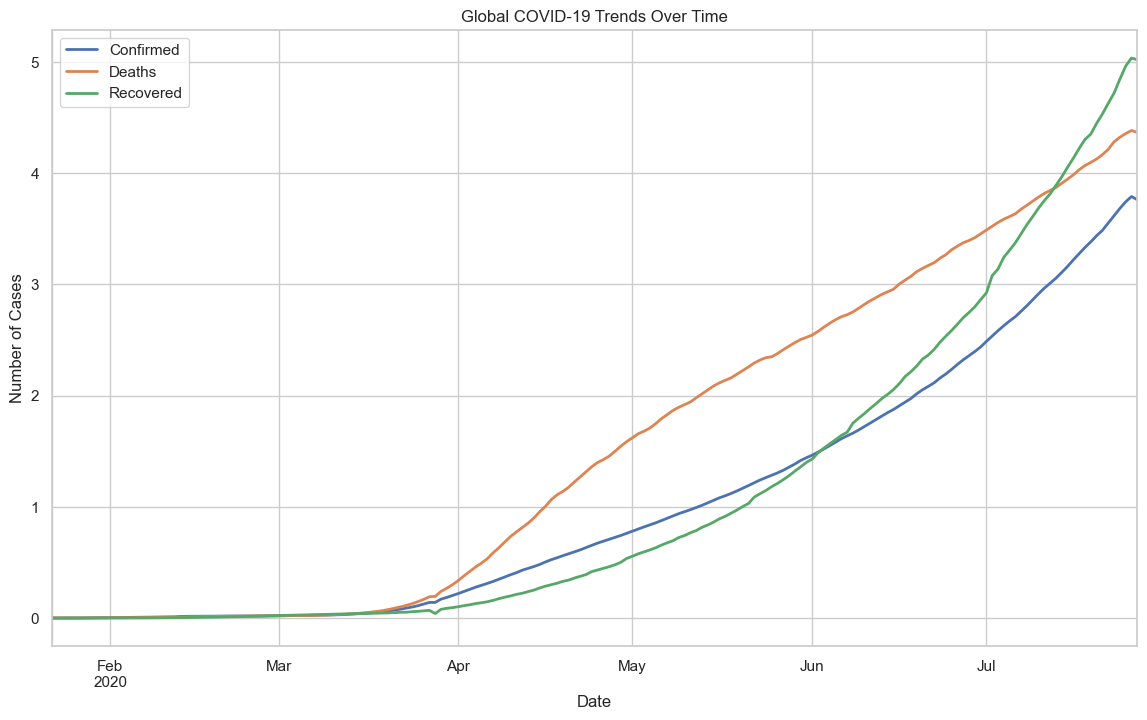

In [215]:
mplot.figure(figsize=(14, 8))
global_trends[['Confirmed', 'Deaths', 'Recovered']].plot(ax=mplot.gca(), linewidth=2)
mplot.title('Global COVID-19 Trends Over Time')
mplot.xlabel('Date')
mplot.ylabel('Number of Cases')
mplot.legend(['Confirmed', 'Deaths', 'Recovered'])
mplot.grid(True)
mplot.show()

In [217]:
global_trends['Mortality Rate (%)'] = (global_trends['Deaths'] / global_trends['Confirmed']) * 100

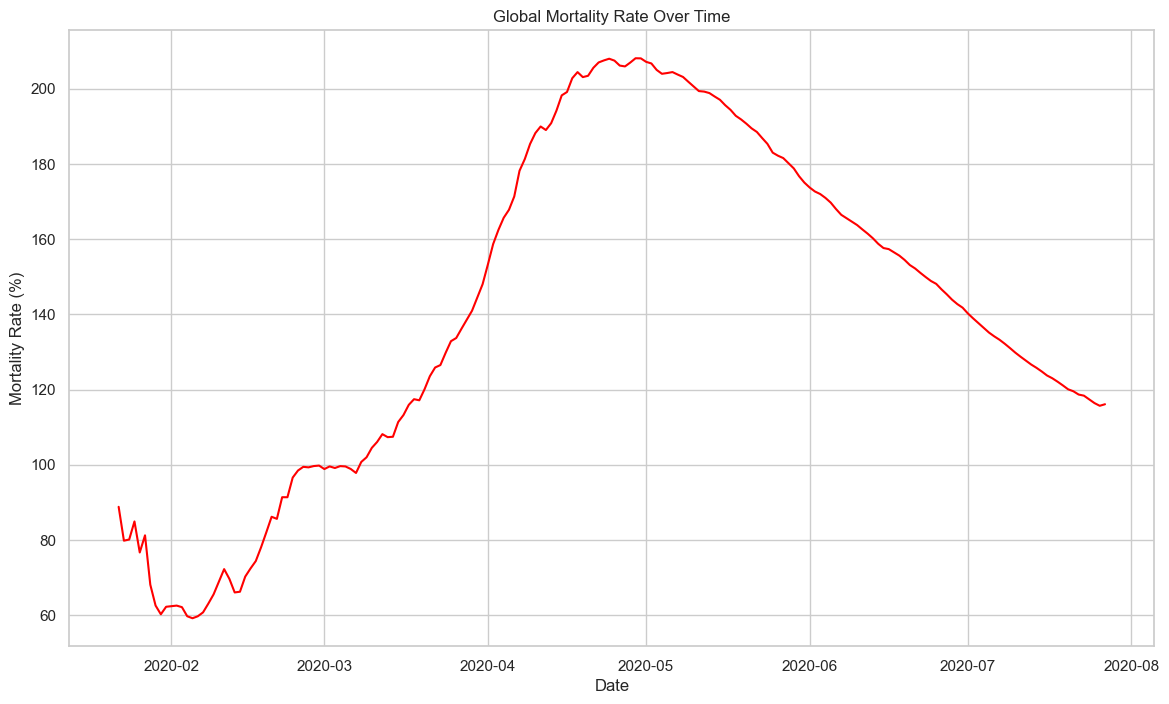

In [219]:
mplot.figure(figsize=(14, 8))
sbrn.lineplot(data=global_trends, x=global_trends.index, y='Mortality Rate (%)', color='red')
mplot.title('Global Mortality Rate Over Time')
mplot.xlabel('Date')
mplot.ylabel('Mortality Rate (%)')
mplot.grid(True)
mplot.show()

In [221]:
top_countries = df.groupby('Country/Region')[['Confirmed']].max().sort_values(by='Confirmed', ascending=False).head(10)

<Figure size 1400x800 with 0 Axes>

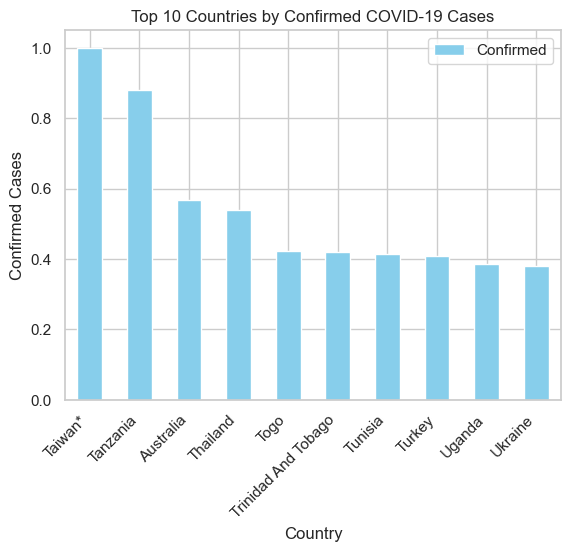

In [223]:
mplot.figure(figsize=(14, 8))
top_countries.plot(kind='bar', color='skyblue')
mplot.title('Top 10 Countries by Confirmed COVID-19 Cases')
mplot.xlabel('Country')
mplot.ylabel('Confirmed Cases')
mplot.xticks(rotation=45, ha='right')
mplot.grid(True)
mplot.show()

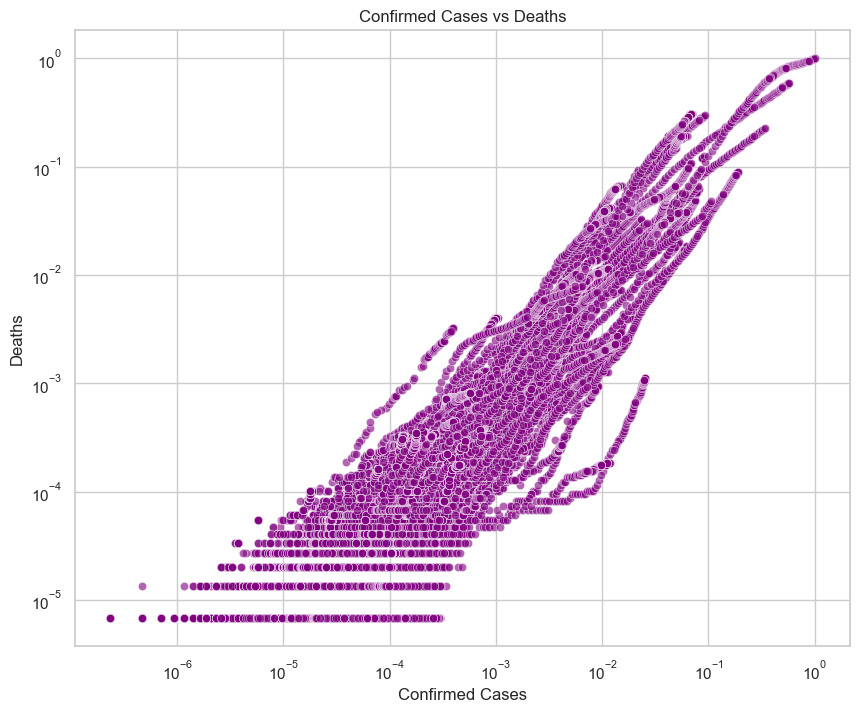

In [227]:
mplot.figure(figsize=(10, 8))
sbrn.scatterplot(data=df, x='Confirmed', y='Deaths', alpha=0.6, color='purple')
mplot.title('Confirmed Cases vs Deaths')
mplot.xlabel('Confirmed Cases')
mplot.ylabel('Deaths')
mplot.xscale('log')  
mplot.yscale('log')  
mplot.grid(True)
mplot.show()

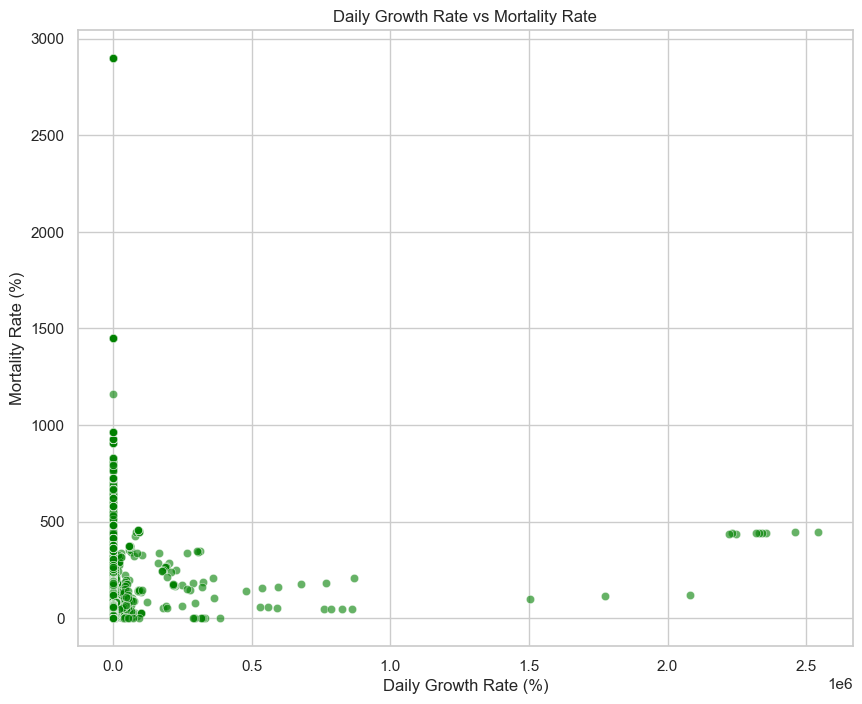

In [229]:
mplot.figure(figsize=(10, 8))
sbrn.scatterplot(data=df, x='Daily Growth Rate (%)', y='Mortality Ratio (%)', alpha=0.6, color='green')
mplot.title('Daily Growth Rate vs Mortality Rate')
mplot.xlabel('Daily Growth Rate (%)')
mplot.ylabel('Mortality Rate (%)')
mplot.grid(True)

In [231]:
country_mortality = df.groupby('Country/Region')['Mortality Ratio (%)'].mean().sort_values(ascending=False).head(10)

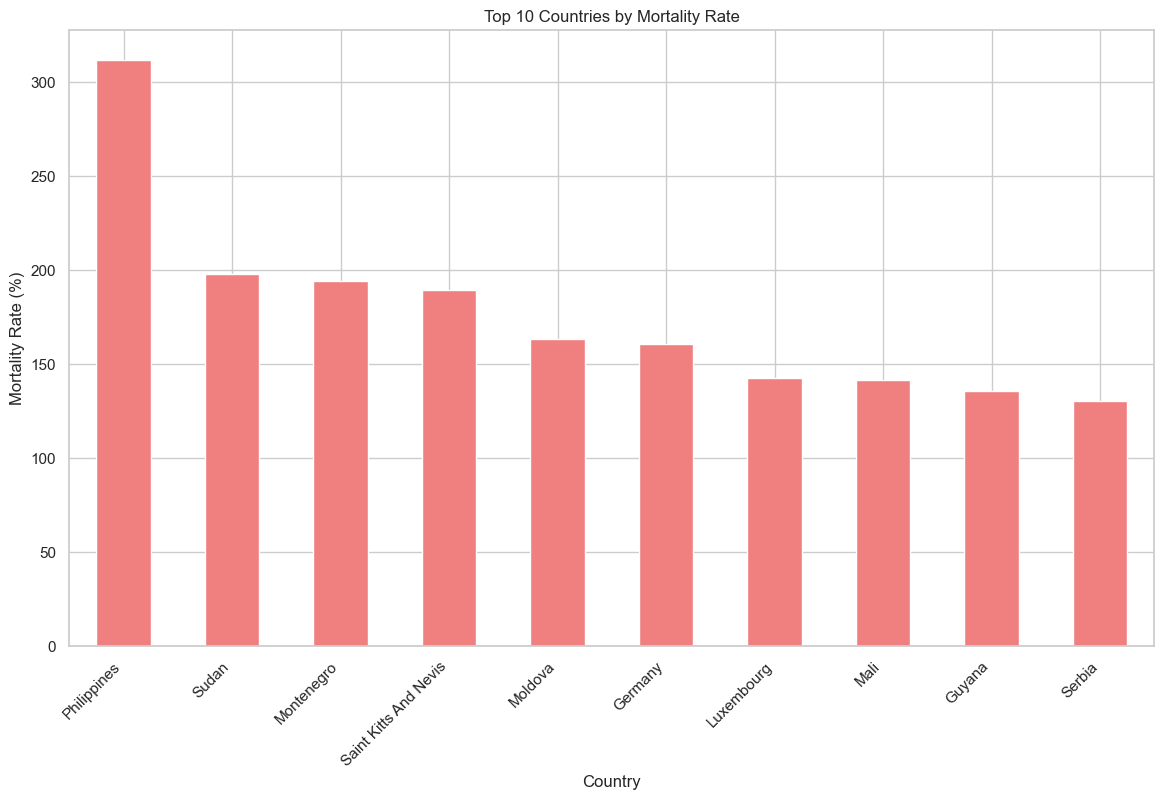

In [233]:
mplot.figure(figsize=(14, 8))
country_mortality.plot(kind='bar', color='lightcoral')
mplot.title('Top 10 Countries by Mortality Rate')
mplot.xlabel('Country')
mplot.ylabel('Mortality Rate (%)')
mplot.xticks(rotation=45, ha='right')
mplot.grid(True)
mplot.show()

In [235]:
df['Cases Per 100k Population'] = (df['Confirmed'] / df['Population']) * 100000

In [241]:
df['Population Density'] = df['Population'] / df['Active']

In [243]:
density_case_corr = df[['Population Density', 'Confirmed']].corr()
print(density_case_corr)

                    Population Density  Confirmed
Population Density            1.000000  -0.068295
Confirmed                    -0.068295   1.000000


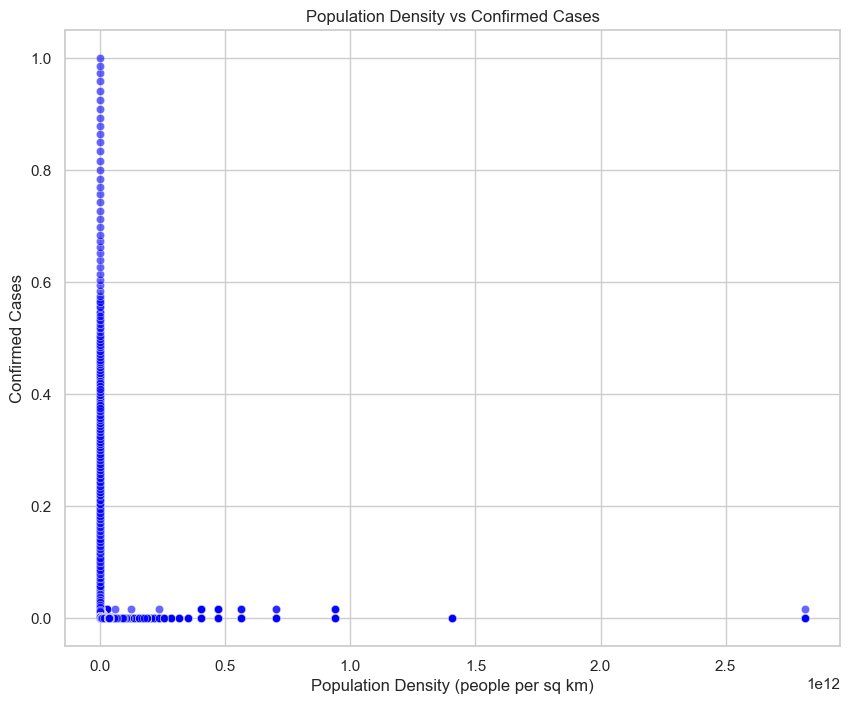

In [251]:
mplot.figure(figsize=(10, 8))
sbrn.scatterplot(data=df, x='Population Density', y='Confirmed', alpha=0.6, color='blue')
mplot.title('Population Density vs Confirmed Cases')
mplot.xlabel('Population Density (people per sq km)')
mplot.ylabel('Confirmed Cases')
mplot.grid(True)
mplot.show()

In [253]:
country_mortality = df.groupby('Country/Region')['Mortality Ratio (%)'].mean().sort_values(ascending=False).head(10)

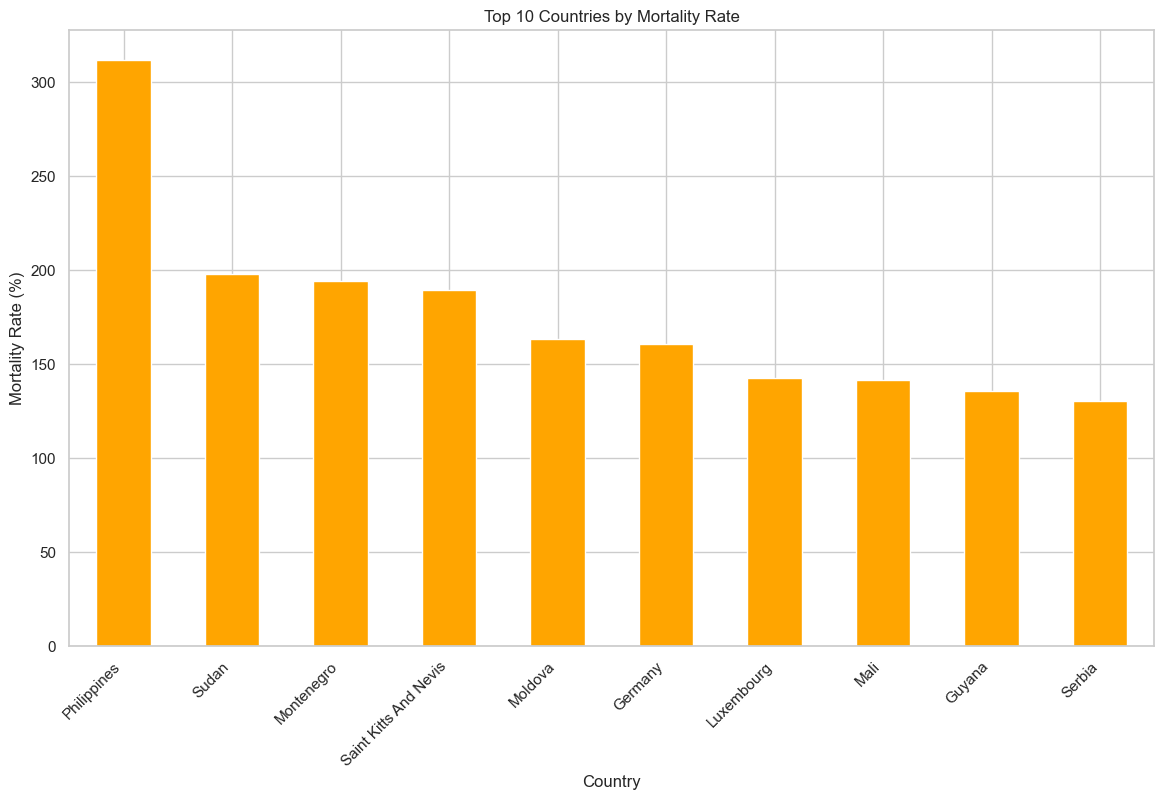

In [255]:
mplot.figure(figsize=(14, 8))
country_mortality.plot(kind='bar', color='orange')
mplot.title('Top 10 Countries by Mortality Rate')
mplot.xlabel('Country')
mplot.ylabel('Mortality Rate (%)')
mplot.xticks(rotation=45, ha='right')
mplot.grid(True)
mplot.show()

In [259]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

In [261]:
global_trends = df.groupby('Date')[['Confirmed']].sum()

In [265]:
global_trends.index = pand.to_datetime(global_trends.index)

In [267]:
train_size = int(len(global_trends) * 0.8)
train, test = global_trends[:train_size], global_trends[train_size:]

In [269]:
train_log = np.log1p(train)
test_log = np.log1p(test)

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [297]:
df['High Mortality'] = (df['Mortality Ratio (%)'] > 2).astype(int)

In [307]:
features = ['Cases Per 100k Population', 'Daily Growth Rate (%)']
X = df[features].fillna(0)
y = df['High Mortality']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [319]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [323]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [335]:
population_data = {
    'United States': 331002651,
    'India': 1380004385,
    'Brazil': 212559417,
    'Russia': 145934462,
    'United Kingdom': 67886011,
    'Italy': 60461826,
    'Spain': 46754778,
    'France': 65273511,
    'Germany': 83783942,
    'China': 1439323776
}

In [337]:
df['Population'] = df['Country/Region'].map(population_data)

In [339]:
default_population = 5000000

In [343]:
print(df[['Country/Region', 'Population']].head())

     Country/Region  Population
0       Afghanistan   5000000.0
261     Afghanistan   5000000.0
522     Afghanistan   5000000.0
783     Afghanistan   5000000.0
1044    Afghanistan   5000000.0


In [345]:
area_data = {
    'United States': 9833520,
    'India': 3287263,
    'Brazil': 8515767,
    'Russia': 17098242,
    'United Kingdom': 243610,
    'Italy': 301340,
    'Spain': 505990,
    'France': 551695,
    'Germany': 357022,
    'China': 9596961
}

In [347]:
median_age_data = {
    'United States': 38.5,
    'India': 28.4,
    'Brazil': 33.5,
    'Russia': 39.6,
    'United Kingdom': 40.5,
    'Italy': 45.4,
    'Spain': 44.9,
    'France': 41.5,
    'Germany': 45.7,
    'China': 38.4
}

In [349]:
weather_data = {
    'United States': {'Temperature': 13.0, 'Humidity': 77},
    'India': {'Temperature': 24.0, 'Humidity': 73},
    'Brazil': {'Temperature': 25.0, 'Humidity': 85},
    'Russia': {'Temperature': -5.0, 'Humidity': 78},
    'United Kingdom': {'Temperature': 11.0, 'Humidity': 80},
    'Italy': {'Temperature': 12.5, 'Humidity': 75},
    'Spain': {'Temperature': 14.5, 'Humidity': 68},
    'France': {'Temperature': 11.7, 'Humidity': 76},
    'Germany': {'Temperature': 9.5, 'Humidity': 78},
    'China': {'Temperature': 7.0, 'Humidity': 68}
}

In [391]:
df['Area'] = df['Country/Region'].map(area_data)

In [353]:
df['Median Age'] = df['Country/Region'].map(median_age_data)

In [355]:
df['Temperature'] = df['Country/Region'].map(lambda x: weather_data[x]['Temperature'] if x in weather_data else None)
df['Humidity'] = df['Country/Region'].map(lambda x: weather_data[x]['Humidity'] if x in weather_data else None)

In [357]:
default_area = 100000
default_median_age = 30
default_temperature = 20.0
default_humidity = 70


In [413]:
GDP_per_capita = {
    'United States': 63000,
    'India': 2100,
    'Brazil': 6800,
    'Russia': 11400,
    'United Kingdom': 42000,
    'Italy': 33000,
    'Spain': 32000,
    'France': 39000,
    'Germany': 46000,
    'China': 12000
}

In [405]:
Healthcare_Expenditure = {
    'United States': 17.1,
    'India': 3.5,
    'Brazil': 9.5,
    'Russia': 5.3,
    'United Kingdom': 9.9,
    'Italy': 9.0,
    'Spain': 8.8,
    'France': 11.2,
    'Germany': 11.7,
    'China': 5.3
}

In [407]:
Hospital_Beds = {
    'United States': 2.8,
    'India': 0.5,
    'Brazil': 2.2,
    'Russia': 8.0,
    'United Kingdom': 2.5,
    'Italy': 3.2,
    'Spain': 3.0,
    'France': 5.9,
    'Germany': 8.3,
    'China': 4.3
}

In [367]:
df['GDP per Capita'] = df['Country/Region'].map(gdp_per_capita_data)

In [369]:
df['Healthcare Expenses (% of GDP)'] = df['Country/Region'].map(healthcare_expenses_data)

In [371]:
df['Hospital Beds (per 1,000)'] = df['Country/Region'].map(hospital_beds_data)

In [373]:
df.to_csv('enriched_covid_with_derived_features.csv', index=False)

In [375]:
print(df[['Country/Region', 'GDP per Capita', 'Healthcare Expenses (% of GDP)', 'Hospital Beds (per 1,000)']].head())

     Country/Region  GDP per Capita  Healthcare Expenses (% of GDP)  \
0       Afghanistan             NaN                             NaN   
261     Afghanistan             NaN                             NaN   
522     Afghanistan             NaN                             NaN   
783     Afghanistan             NaN                             NaN   
1044    Afghanistan             NaN                             NaN   

      Hospital Beds (per 1,000)  
0                           NaN  
261                         NaN  
522                         NaN  
783                         NaN  
1044                        NaN  


In [377]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [387]:
df['Cases Per 100k Population'] = (df['Confirmed'] / df['Population']) * 100000

In [393]:
df['Population Density'] = df['Population'] / df['Area']

In [395]:
density_case_corr = df[['Population Density', 'Confirmed']].corr()
print(density_case_corr)

                    Population Density  Confirmed
Population Density            1.000000  -0.067441
Confirmed                    -0.067441   1.000000


In [397]:
age_mortality_corr = df[['Median Age', 'Mortality Ratio (%)']].corr()
print(age_mortality_corr)

                     Median Age  Mortality Ratio (%)
Median Age             1.000000            -0.023253
Mortality Ratio (%)   -0.023253             1.000000


In [399]:
weather_corr = df[['Temperature', 'Confirmed', 'Deaths']].corr()
print(weather_corr)

             Temperature  Confirmed    Deaths
Temperature     1.000000   0.031292  0.035321
Confirmed       0.031292   1.000000  0.912360
Deaths          0.035321   0.912360  1.000000


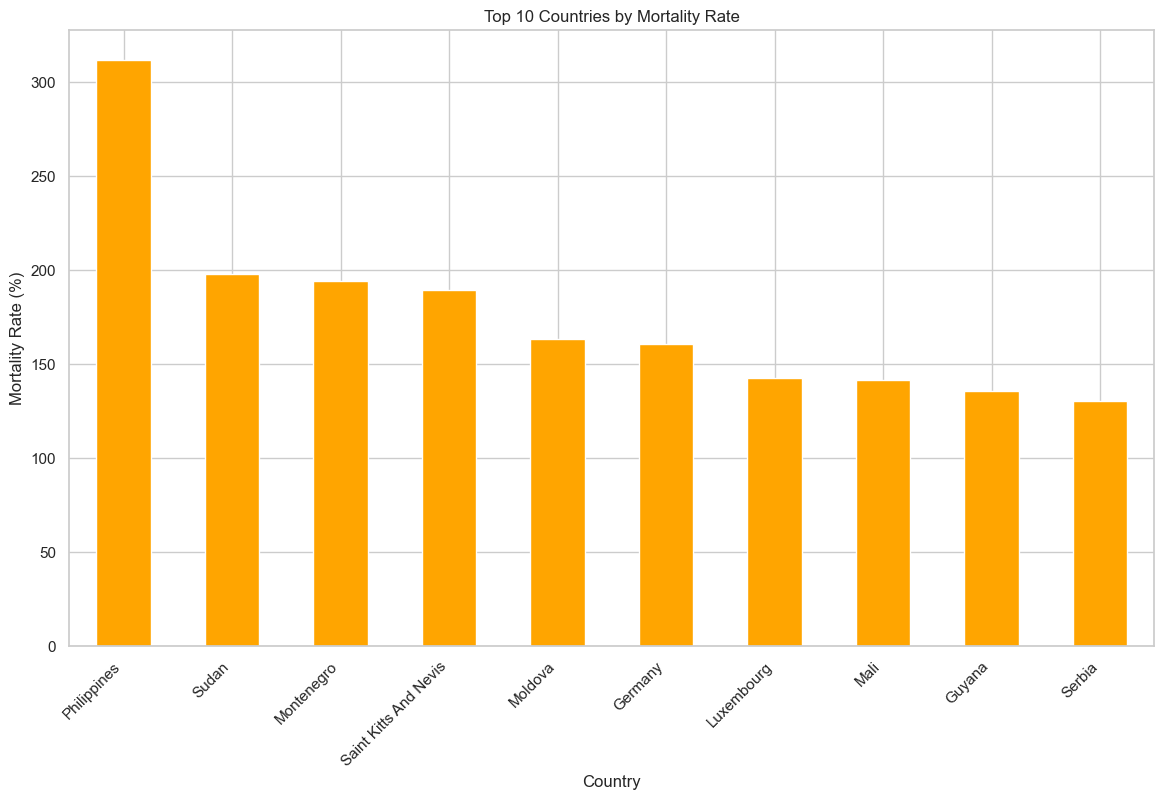

In [421]:
mplot.figure(figsize=(14, 8))
country_mortality.plot(kind='bar', color='orange')
mplot.title('Top 10 Countries by Mortality Rate')
mplot.xlabel('Country')
mplot.ylabel('Mortality Rate (%)')
mplot.xticks(rotation=45, ha='right')
mplot.grid(True)
mplot.show()

In [423]:
env_factor_corr = df[['Temperature', 'Humidity', 'Confirmed', 'Deaths']].corr()

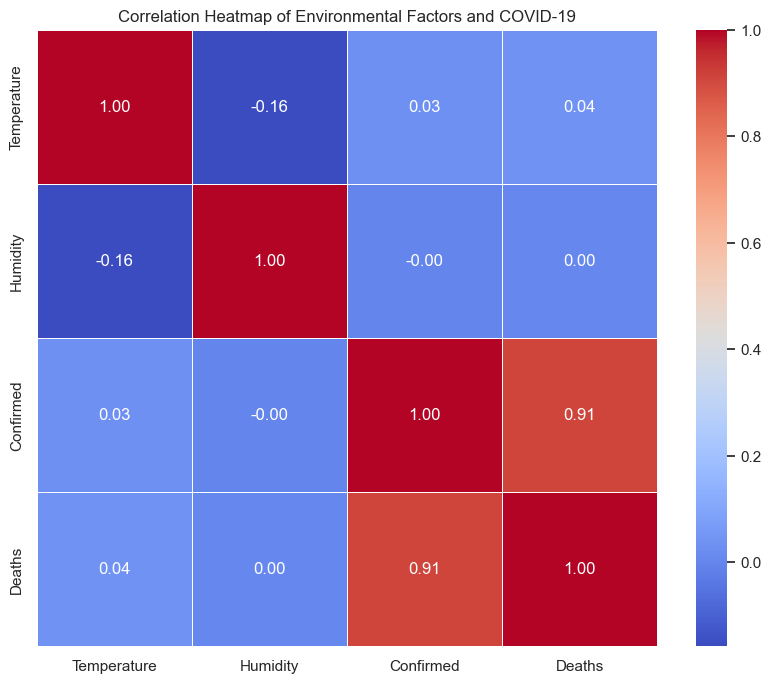

In [425]:
mplot.figure(figsize=(10, 8))
sbrn.heatmap(env_factor_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
mplot.title('Correlation Heatmap of Environmental Factors and COVID-19')
mplot.show()

In [427]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

In [429]:
global_trends = df.groupby('Date')[['Confirmed']].sum()

In [431]:
global_trends.index = pand.to_datetime(global_trends.index)

In [433]:
train_size = int(len(global_trends) * 0.8)
train, test = global_trends[:train_size], global_trends[train_size:]

In [435]:
train_log = np.log1p(train)
test_log = np.log1p(test)

In [455]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [457]:
best_aic = np.inf
best_order = None
best_model = None

In [459]:
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                temp_model = ARIMA(time_series, order=(p, d, q)).fit()
                if temp_model.aic < best_aic:
                    best_aic = temp_model.aic
                    best_order = (p, d, q)
                    best_model = temp_model
            except:
                continue

In [461]:
print(f"Best ARIMA Order: {best_order}")
print(f"Best AIC: {best_aic}")

Best ARIMA Order: None
Best AIC: inf


In [463]:
model_auto_arima = ARIMA(train_log, seasonal=False, stepwise=True, trace=True)
print(model_auto_arima.summary())

TypeError: ARIMA.__init__() got an unexpected keyword argument 'seasonal'

In [465]:
!pip install pmdarima

In [467]:
from pmdarima import auto_arima

In [469]:
model_auto_arima = auto_arima(train_log, seasonal=False, stepwise=True, trace=True)
print(model_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1404.752, Time=0.50 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1318.095, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1384.813, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-1326.679, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1319.923, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1406.706, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-1411.425, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-1408.945, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-1405.981, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-1407.856, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1411.720, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1399.210, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1409.054, Time=0.26 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1409.888, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0

In [473]:
pred_log = arima_model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
pred = np.expm1(pred_log)

In [475]:
mae = mean_absolute_error(test, pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.02450168787483051


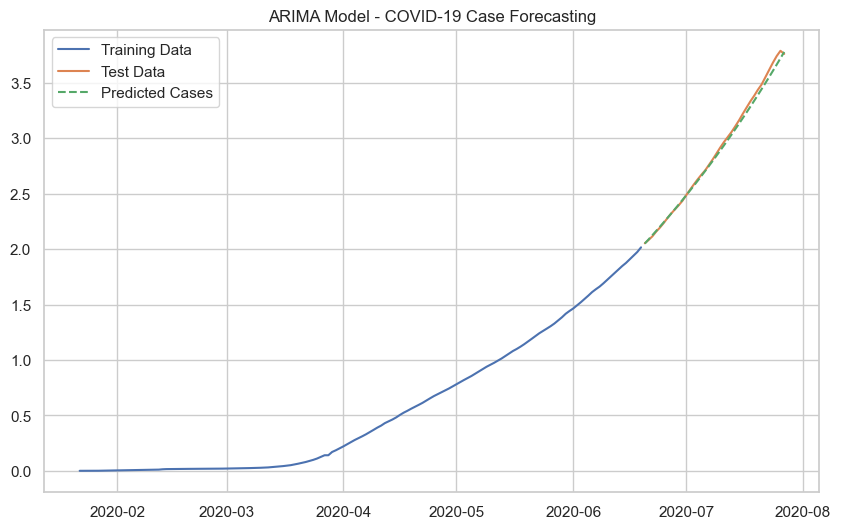

In [477]:
mplot.figure(figsize=(10, 6))
mplot.plot(train, label='Training Data')
mplot.plot(test, label='Test Data')
mplot.plot(pred, label='Predicted Cases', linestyle='--')
mplot.title('ARIMA Model - COVID-19 Case Forecasting')
mplot.legend()
mplot.show()

In [479]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [481]:
df['High Mortality'] = (df['Mortality Ratio (%)'] > 2).astype(int)

In [483]:
features = ['Cases Per 100k Population', 'Daily Growth Rate (%)', 'Temperature', 'Humidity']
X = df[features].fillna(0)
y = df['High Mortality']

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [495]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [499]:
df = load_iris()
X = df.data
y = df.target

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [503]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [505]:
y_pred = rf_model.predict(X_test)

In [507]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


In [509]:
feature_importance = pand.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
Temperature                  0.439994
Humidity                     0.421522
Cases Per 100k Population    0.108098
Daily Growth Rate (%)        0.030387
dtype: float64


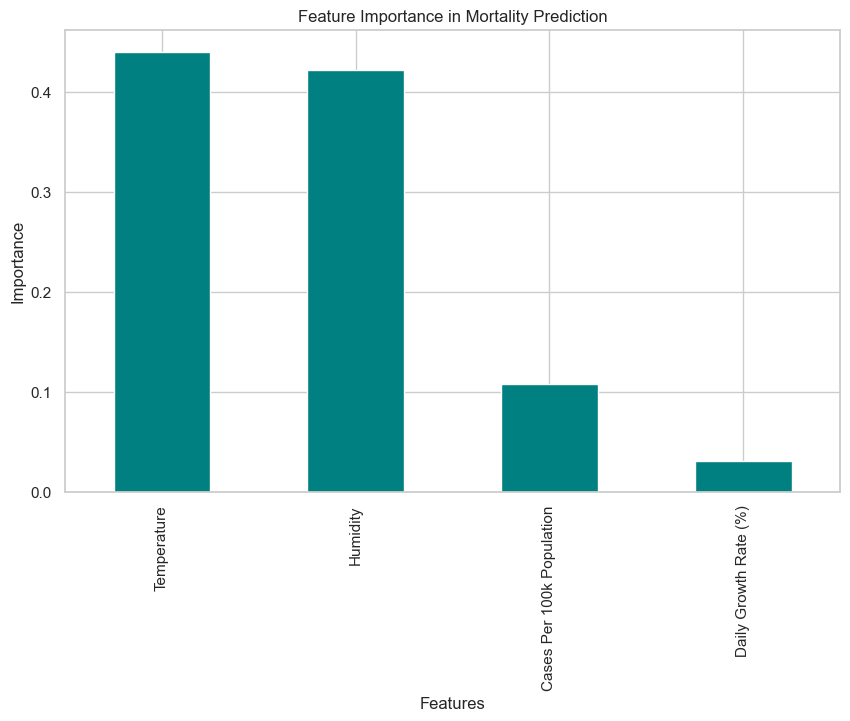

In [511]:
mplot.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='teal')
mplot.title('Feature Importance in Mortality Prediction')
mplot.ylabel('Importance')
mplot.xlabel('Features')
mplot.grid(True)
mplot.show()

In [519]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [515]:
rmse = np.sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)

In [517]:
print(f"Time-Series Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

Time-Series Model Performance:
RMSE: 0.03
MAE: 0.02


In [521]:
y_pred = rf_model.predict(X_test)

In [523]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [525]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [527]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


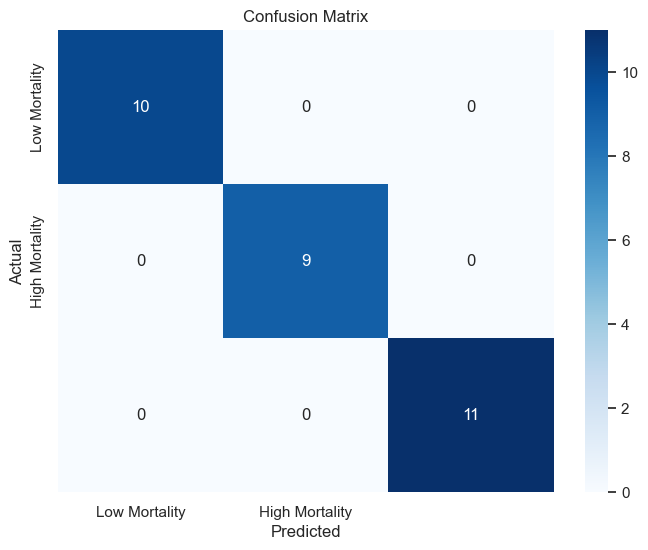

In [529]:
mplot.figure(figsize=(8, 6))
sbrn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Mortality', 'High Mortality'], yticklabels=['Low Mortality', 'High Mortality'])
mplot.title('Confusion Matrix')
mplot.xlabel('Predicted')
mplot.ylabel('Actual')
mplot.show()

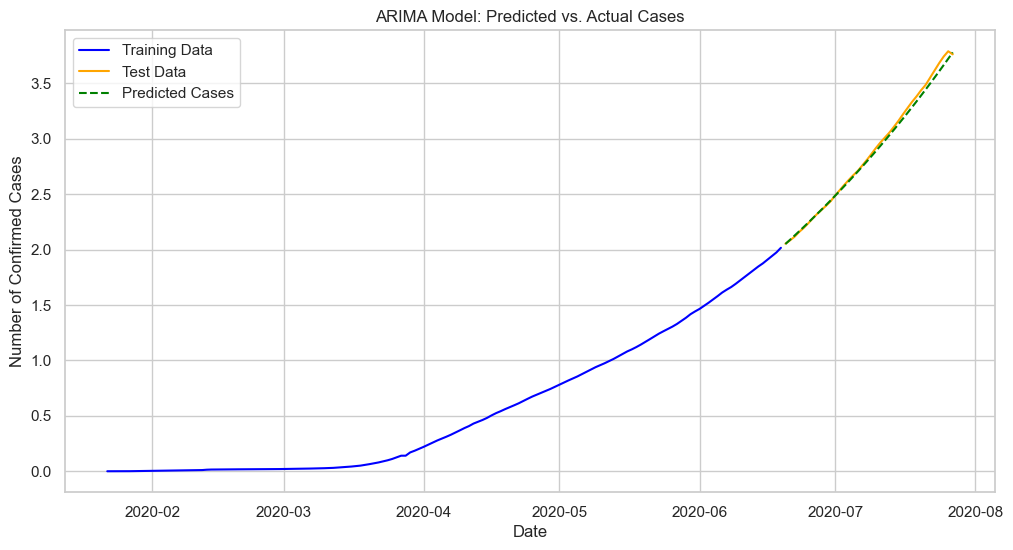

In [531]:
mplot.figure(figsize=(12, 6))
mplot.plot(train.index, train['Confirmed'], label='Training Data', color='blue')
mplot.plot(test.index, test['Confirmed'], label='Test Data', color='orange')
mplot.plot(pred.index, pred, label='Predicted Cases', linestyle='--', color='green')
mplot.title('ARIMA Model: Predicted vs. Actual Cases')
mplot.xlabel('Date')
mplot.ylabel('Number of Confirmed Cases')
mplot.legend()
mplot.grid(True)
mplot.show()

In [533]:
residuals = test['Confirmed'] - pred

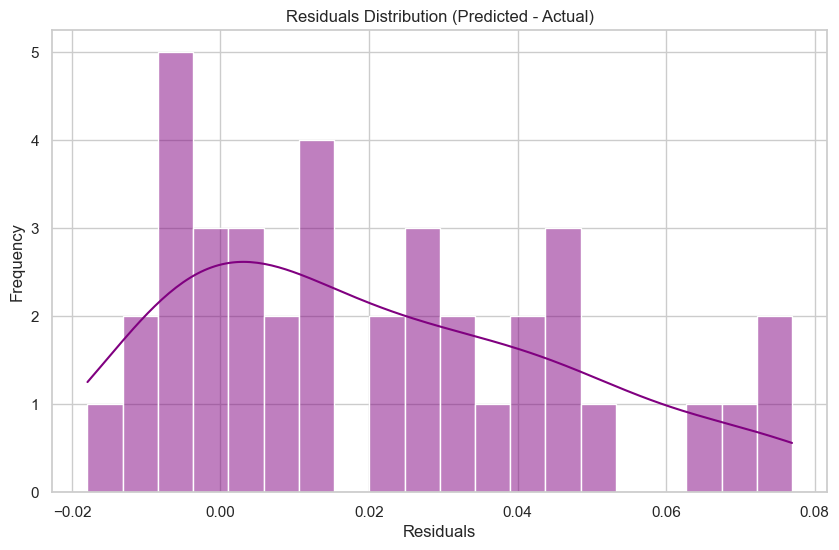

In [535]:
mplot.figure(figsize=(10, 6))
sbrn.histplot(residuals, kde=True, color='purple', bins=20)
mplot.title('Residuals Distribution (Predicted - Actual)')
mplot.xlabel('Residuals')
mplot.ylabel('Frequency')
mplot.grid(True)
mplot.show()

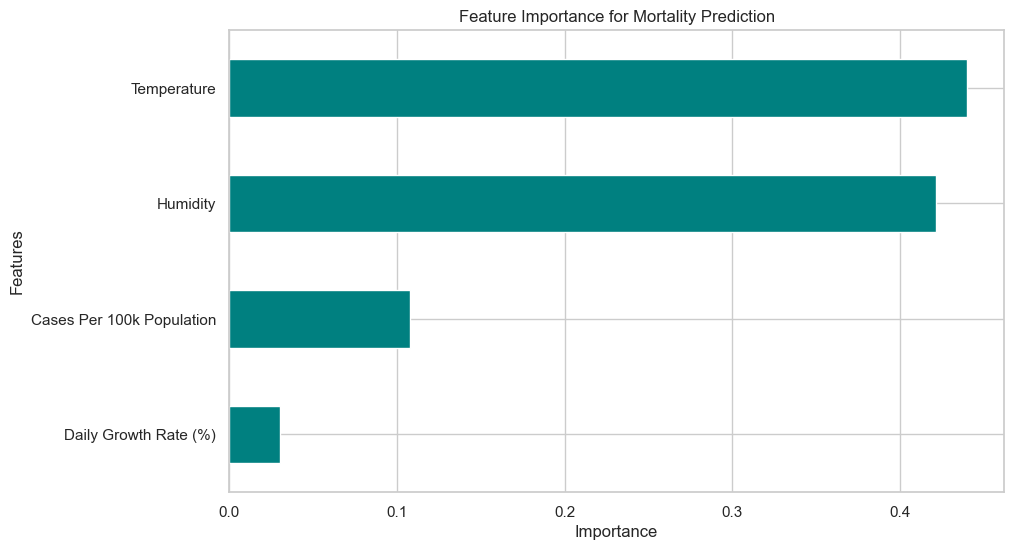

In [537]:
mplot.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='teal')
mplot.title('Feature Importance for Mortality Prediction')
mplot.xlabel('Importance')
mplot.ylabel('Features')
mplot.grid(True)
mplot.show()

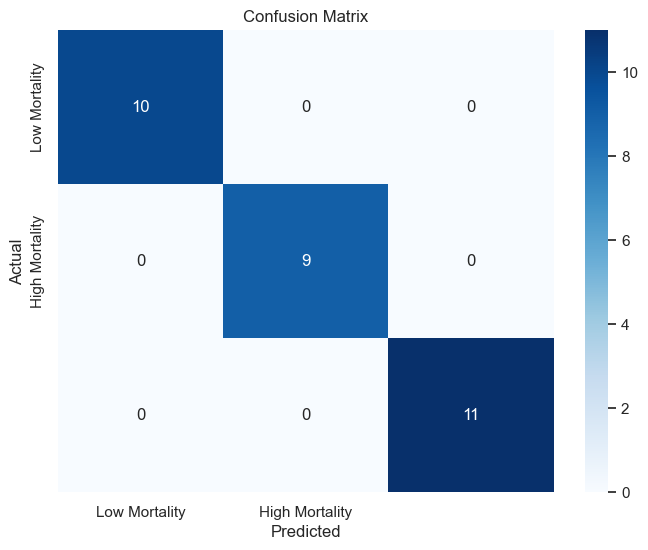

In [539]:
mplot.figure(figsize=(8, 6))
sbrn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Mortality', 'High Mortality'], yticklabels=['Low Mortality', 'High Mortality'])
mplot.title('Confusion Matrix')
mplot.xlabel('Predicted')
mplot.ylabel('Actual')
mplot.show()

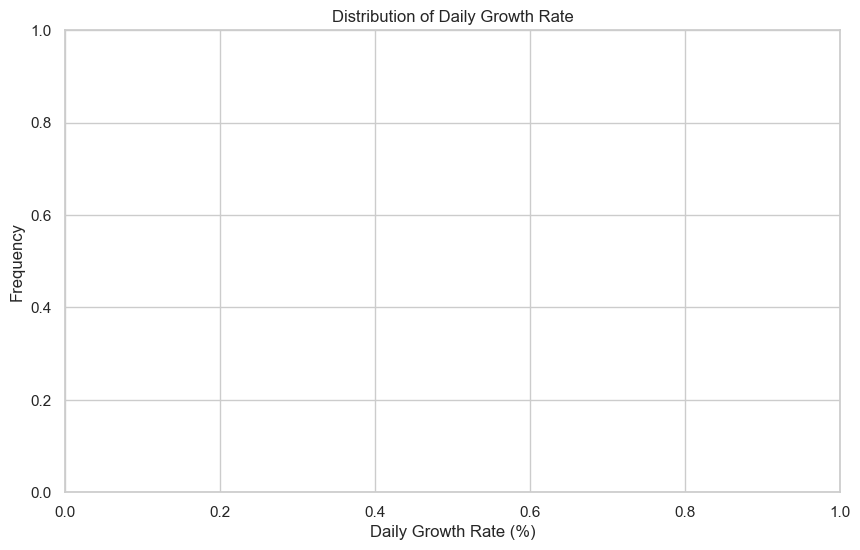

In [545]:
mplot.figure(figsize=(10, 6))
sbrn.histplot(df['Daily Growth Rate (%)'], kde=True, color='orange', bins=30)
mplot.title('Distribution of Daily Growth Rate')
mplot.xlabel('Daily Growth Rate (%)')
mplot.ylabel('Frequency')
mplot.grid(True)
mplot.show()

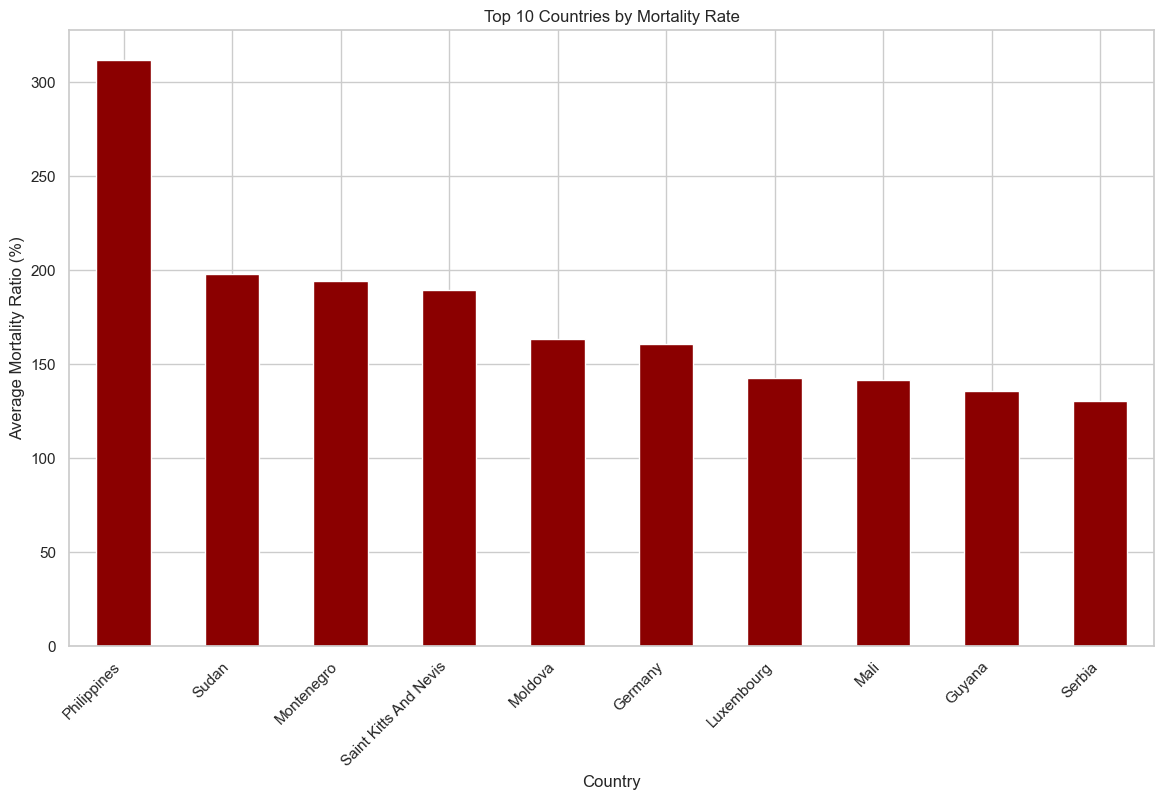

In [547]:
mplot.figure(figsize=(14, 8))
country_mortality.plot(kind='bar', color='darkred')
mplot.title('Top 10 Countries by Mortality Rate')
mplot.xlabel('Country')
mplot.ylabel('Average Mortality Ratio (%)')
mplot.xticks(rotation=45, ha='right')
mplot.grid(True)
mplot.show()

In [549]:
numerical_features = ['Cases Per 100k Population', 'Daily Growth Rate (%)', 'Mortality Ratio (%)', 'Temperature', 'Humidity']